In [2]:
## implemented LINK with solver='lbfgs'
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages
import os

## relevant libraries
execfile('../functions/python_libraries.py')

## processing datasets
execfile('../functions/create_adjacency_matrix.py') 
execfile('../functions/create_directed_adjacency_matrix.py')


execfile('../functions/parsing.py')
execfile('../functions/mixing.py')

## code for gender prediction 
execfile('../functions/LINK.py')
execfile('../functions/majority_vote.py')

execfile('../functions/ZGL.py')
execfile('../functions/benchmark_classifier.py')
execfile('../functions/SI_functions/LINK_finalized_coeff.py')

## gender preference distribution
execfile('../functions/compute_null_distribution.py')

In [3]:
## load Amherst only

## filename where relevant FB100 data is stored
fb100_file = '/Users/kristen/Dropbox/gender_graph_data/FB_processing_pipeline/data/0_original/'


for f in listdir(fb100_file):
    if f.endswith('.mat'):
        tag = f.replace('.mat', '')
        if (tag == 'Amherst41'):
            print tag
            input_file = path_join(fb100_file, f)
            A, metadata = parse_fb100_mat_file(input_file)

            adj_matrix_tmp = A.todense()
            gender_y_tmp = metadata[:,1] #gender
                
            gender_dict = create_dict(range(len(gender_y_tmp)), gender_y_tmp)
                
            (gender_y, adj_matrix_gender) = create_adj_membership(
                                    nx.from_numpy_matrix(adj_matrix_tmp), # graph
                                                           gender_dict,   # dictionary
                                                           0,             # val_to_drop, gender = 0 is missing
                                                           'yes',         # delete_na_cols, ie completely remove NA nodes from graph
                                                           0,             # diagonal
                                                           None,          # directed_type
                                                           'gender')      # gender
            
            gender_y = np.array(map(np.int,gender_y)) ## need np.int for machine precisions reasons

Amherst41


In [4]:
F_fb_label = 1
M_fb_label = 2

In [5]:
prop_class_2 =(adj_matrix_gender * np.matrix(gender_y==2).T)/(np.sum(adj_matrix_gender,1))

In [6]:
percent_initially_unlabelled = [0.1]#[0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

In [7]:
n_iter = 1

In [8]:
coef= LINK_coeff(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(gender_y), ## gender labels 
                                                              np.matrix(adj_matrix_gender), ## adjacency matrix
                                                              clf = linear_model.LogisticRegression(penalty='l2',C=10e20,
                                                                                                   solver='lbfgs'),num_iter=n_iter) 




0.1


In [9]:
coef

array([ -3.07410785,  -5.36700368,   8.51785953, ...,   4.53199931,
        -0.54351984,  13.05801042])

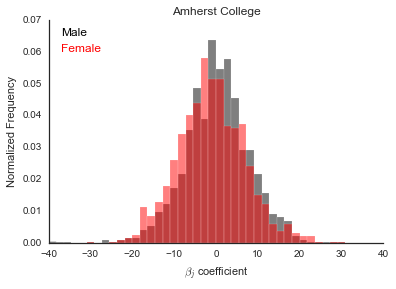

In [10]:
%matplotlib inline
ax = plt.subplot(111)
alpha_parameter = 0.5
binBoundaries=np.linspace(-40,40,num=45)

ax.hist(coef[gender_y==2], color='black', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')

ax.hist(coef[gender_y==1], color='red', #alpha=0.1,
        bins=binBoundaries, 
                     normed = True,
                     alpha = alpha_parameter, label='empirical',
                    edgecolor = 'white')
plt.xlabel(r'$\beta_j$ coefficient')
plt.ylabel('Normalized Frequency')
plt.title('Amherst College')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate('Female', xy=(-37, 0.06), 
                 color='red', alpha=1, size=12)

ax.annotate('Male', xy=(-37, 0.065), 
                 color='black', alpha=1, size=12)


pp = PdfPages('../../figures/Amherst_College_Butterfly_histogram.pdf')
pp.savefig()
pp.close()